In [17]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue



In [18]:

import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue




In [19]:
def heuristic(node_a, node_b):
    # Calculate the Manhattan distance between two nodes
    return abs(node_a.position[0] - node_b.position[0]) + abs(node_a.position[1] - node_b.position[1])



In [20]:
def a_star_search(start, goal, grid):
    open_list = PriorityQueue()  # Nodes to be evaluated
    closed_list = []             # Nodes already evaluated

    start_node = Node(start)      # Create start node
    goal_node = Node(goal)        # Create goal node

    open_list.put(start_node)     # Add start node to open list

    while not open_list.empty():
        current_node = open_list.get()  # Get node with lowest f
        closed_list.append(current_node)  # Mark it as evaluated

        if current_node == goal_node:  # Check if we reached the goal
            path = []
            while current_node:  # Trace back the path
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return reversed path

        # Get neighbors of the current node
        neighbors = get_neighbors(current_node, grid)

        for next_position in neighbors:
            neighbor_node = Node(next_position, current_node)  # Create neighbor node

            if neighbor_node in closed_list:
                continue  # Skip if already evaluated

            # Calculate costs for the neighbor
            neighbor_node.g = current_node.g + 1
            neighbor_node.h = heuristic(neighbor_node, goal_node)
            neighbor_node.f = neighbor_node.g + neighbor_node.h

            if add_to_open(open_list, neighbor_node):  # Check if it should be added to open list
                open_list.put(neighbor_node)  # Add neighbor to open list

    return []  # Return empty path if no path found



In [21]:
def get_neighbors(node, grid):
    neighbors = []  # List to store valid neighbors
    for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Possible movements
        node_position = (node.position[0] + new_position[0], node.position[1] + new_position[1])

        # Check if the neighbor is within grid boundaries
        if (node_position[0] > (len(grid) - 1) or
            node_position[0] < 0 or
            node_position[1] > (len(grid[len(grid)-1]) - 1) or
            node_position[1] < 0):
            continue

        if grid[node_position[0]][node_position[1]] != 0:  # Check if walkable
            continue

        neighbors.append(node_position)  # Add valid neighbor

    return neighbors


In [22]:

def add_to_open(open_list, neighbor_node):
    # Check if the neighbor should be added to the open list
    for item in open_list.queue:
        if neighbor_node == item and neighbor_node.g > item.g:
            return False  # If a better path exists, do not add
    return True  # Otherwise, add to open list



Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


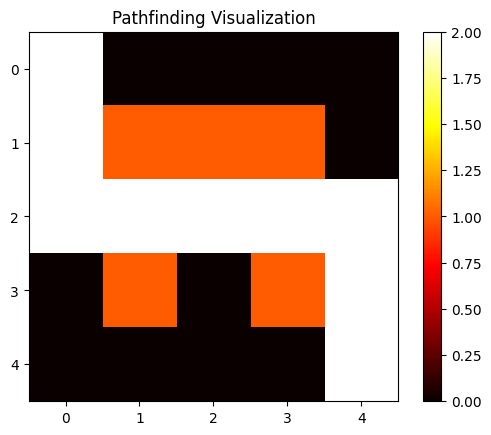

In [25]:
if __name__ == "__main__":
    grid = np.array([[0, 0, 0, 0, 0],
                     [0, 1, 1, 1, 0],
                     [0, 0, 0, 0, 0],
                     [0, 1, 0, 1, 0],
                     [0, 0, 0, 0, 0]])

    start = (0, 0)  # Starting position
    goal = (4, 4)   # Goal position

    path = a_star_search(start, goal, grid)  # Execute the A* search algorithm

    print("Path found:", path)  # Output the found path
    visualize_grid(grid, path)  # Visualize the grid and path
